word correlations, frequently used words or phrases, and topics

__Source__ : https://www.datacamp.com/community/tutorials/wordcloud-python

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [10]:
elon_part1 = []
with open('elon_part1.txt') as f:
    elon_part1 = f.read()

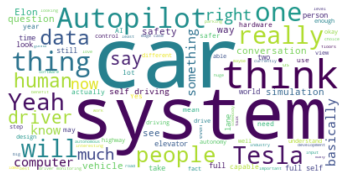

In [13]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(elon_part1)

# Display the generated image:
# bilinear makes the displayed image appear smoother
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# Save the image in the img folder:
wordcloud.to_file("first_wordcloud.png")

In [15]:
elon_part2 = []
with open('elon_part2.txt') as f:
    elon_part2 = f.read()

In [47]:
tesla_mask = np.array(Image.open("new_tesla.png"))

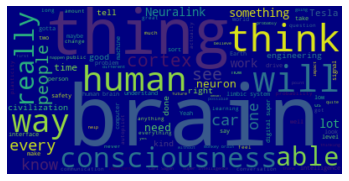

In [53]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="navy").generate(elon_part2)

# Display the generated image:
# bilinear makes the displayed image appear smoother
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# Save the image in the img folder:
wordcloud.to_file("second_wordcloud.png")

__Observation__ : There was a change in the language used between the two interviews. The most common words in the first interview include car, system, and think. The most common words in the second interview include brain, think, human, and way.

In [64]:
updated_elon_part1 = elon_part1.replace("\n"," ")

In [146]:
updated_elon_part2 = elon_part2.replace("\n"," ")

In [69]:
import re

In [72]:
new_2_elon_part1 = re.sub('\s{2,}', ' ', new_elon_part1)

In [150]:
new_2_elon_part2 = re.sub('\s{2,}', ' ', updated_elon_part2)

In [75]:
from textblob import TextBlob

In [78]:
import nltk

In [80]:
nltk.download("brown")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [82]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [86]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [76]:
blob1 = TextBlob(new_2_elon_part1)

In [152]:
blob2 = TextBlob(new_2_elon_part2)

### Tokenization

In [121]:
blob1.words[:10]

WordList(['The', 'following', 'is', 'a', 'conversation', 'with', 'Elon', 'Musk', 'He', "'s"])

In [122]:
blob1.sentences[:4]

[Sentence("- The following is a conversation with Elon Musk."),
 Sentence("He's the CEO of Tesla, SpaceX, Neuralink, and a co-founder of several other companies."),
 Sentence("This conversation is part of the Artificial Intelligence Podcast."),
 Sentence("This series includes leading researchers in academia and industry, including CEOs and CTOs of automotive, robotics, AI and technology companies.")]

In [123]:
for sentence in blob1.sentences[:4]:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.0625, subjectivity=0.1875)
Sentiment(polarity=-0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)


### Noun Phrase Extraction

In [84]:
# for np in blob1.noun_phrases:
#     print(np)

In [87]:
type(blob1.tags)

list

### Part-of-Speech Tagging

CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent‘s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO to go ‘to‘ the store.
UH interjection errrrrrrrm
VB verb, base form take
VBD verb, past tense took
VBG verb, gerund/present participle taking
VBN verb, past participle taken
VBP verb, sing. present, non-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-abverb where, when

In [88]:
for words, tag in blob1.tags[:20]:
    print(words, tag)

The DT
following NN
is VBZ
a DT
conversation NN
with IN
Elon NNP
Musk NNP
He PRP
's VBZ
the DT
CEO NNP
of IN
Tesla NNP
SpaceX NNP
Neuralink NNP
and CC
a DT
co-founder NN
of IN


### Word Inflection and Lemmatization

__Word Inflection__ - a process of word formation in which characters are added to the base form of a word to express grammatical meanings (ex; singularize or pluralize words)

In [104]:
blob1.sentences[0]

Sentence("- The following is a conversation with Elon Musk.")

In [102]:
blob1.sentences[0].words[4].pluralize()

'conversations'

In [106]:
from textblob import Word

In [107]:
w = Word("Platforms")

In [108]:
w.singularize()

'Platform'

In [109]:
for word, pos in blob1.tags[:10]:
    if pos == "NN":
        print(word.pluralize())

followings
conversations


__Lemmatization__ - sort so as to group together inflected or variant forms of the same word.

In [110]:
w = Word("running")

In [113]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [117]:
w.lemmatize("v")

'run'

### N-Grams

In [118]:
for ngram in blob1.ngrams(2)[:10]:
    print(ngram)

['The', 'following']
['following', 'is']
['is', 'a']
['a', 'conversation']
['conversation', 'with']
['with', 'Elon']
['Elon', 'Musk']
['Musk', 'He']
['He', "'s"]
["'s", 'the']


### Sentiment Analysis

__polarity__ - a  float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

__subjectivity__ - Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]

- uses the NLTK training set

In [125]:
blob1.sentiment

Sentiment(polarity=0.13759123350032446, subjectivity=0.48590705227068903)

_Note_ : In terms of speed, Spacy is better than TextBlob, which is better than NLTK

Ideas:
    - do it by section
    - do YouTube comments

In [153]:
blob2.sentiment

Sentiment(polarity=0.14065844103750247, subjectivity=0.4892637990268854)

__Observation__ : There is little-to-no difference between sentiments and and subjectivity. The conversations between Elon and Lex are slightly positive. The conversations are rated halfway between subjective and objective.

In [185]:
def commentAnalysis(excel_file):
    df = pd.read_excel(excel_file, sheet_name='Sheet1', usecols=['comments'])
    sum_polarity = 0
    sum_subjectivity = 0
    for i in range(df.shape[0]):
        temp = TextBlob(df.iloc[i][0])
        sum_polarity = temp.sentiment.polarity + sum_polarity
        sum_subjectivity = temp.sentiment.subjectivity + sum_subjectivity
    print("Polarity is: ", sum_polarity / df.shape[0])
    print("Subjectivity is: ", sum_subjectivity / df.shape[0])

In [187]:
commentAnalysis("elon_lex_1_comments.xlsx")

Polarity is:  0.11370032511873177
Subjectivity is:  0.4017177677050045


In [157]:
elon_lex_1_comments = pd.read_excel("elon_lex_1_comments.xlsx", 
                                    sheet_name='Sheet1', 
                                    usecols=['comments'])
sum_polarity = 0
sum_subjectivity = 0
for i in range(elon_lex_1_comments.shape[0]):
    temp = TextBlob(elon_lex_1_comments.iloc[i][0])
    sum_polarity = temp.sentiment.polarity + sum_polarity
    sum_subjectivity = temp.sentiment.subjectivity + sum_subjectivity

In [183]:
sum_polarity / elon_lex_1_comments.shape[0]

0.11370032511873177

In [184]:
sum_subjectivity / elon_lex_1_comments.shape[0]

0.4017177677050045

In [166]:
elon_lex_1_comments.iloc[0][0]

"This was an insightful discussion on various aspects of Tesla Autopilot that I hope catalyzes further nuanced conversation on the future of AI-assisted driving. Starts at 2:35. The full outline of the video is as follows:  0:00 Introduction  2:35 Start of conversation: Autopilot motivation  4:01 Display the vehicle's perception of the driving scene  7:11 Algorithms, data, and hardware development  10:23 Edge cases and common cases in driving  12:18 Navigate on Autopilot  13:57 Hardware and software path toward fully autonomy  17:08 Driver supervision of Autopilot  20:13 Human side of Tesla Autopilot (driver functional vigilance)   23:13 Driver monitoring  24:30 Operational design domain  26:57 Securing Autopilot against adversarial machine learning  28:29 Narrow AI and artificial general intelligence  30:10 Physics view of love  31:53 First question for an artificial general intelligence system"

In [ ]:
TextBlob()

Sources
 - How to download comments from YouTube with Facepager - https://www.youtube.com/watch?v=1Nt1gJu-hzU